In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook', font_scale=0.9, rc={'figure.figsize':(11.7/2,8.27/2)})


In [4]:
df = pd.read_csv('lib_USD_4Y.csv',delimiter=';', index_col=0)

In [5]:
# data index
df.index = pd.to_datetime(df.index, infer_datetime_format=True)
df = df.dropna()


## Matrix Analysis
- Hirarchical 
- Graph
- Spectral

### Hirarchical 

#### Defining main metrics
- Correlation matrix
- Distance 1 : $d^1_{i,j} = 1 - \rho_{i,j}$
- Distance 2 : $d^2_{i,j} = \sqrt{2(1 - \rho_{i,j})}$

In [6]:
# correleation matrix
corr = df.corr()
#distance matrix
from scipy.spatial.distance import pdist, squareform
dist_1 = 1-corr
dist_2 = ((1-corr)*2)**0.5

#### Heat for the three metrics
Help to get intuition about the simliraty/distances between each time horizon.

Thanks to square root the distance 2 is more discriminative than distance 1 for values close to 0 (i.e. high correlation).

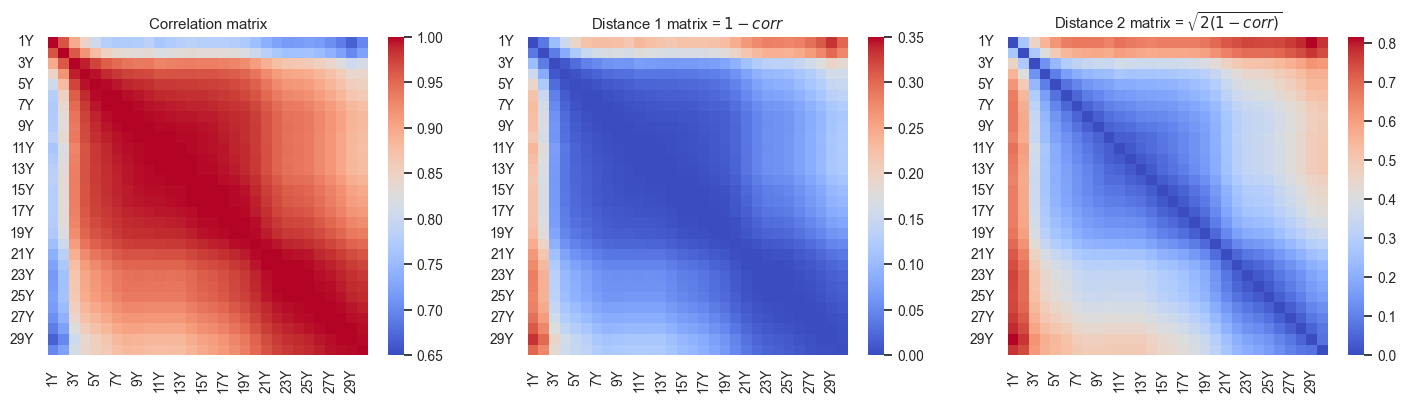

In [7]:
# plot distance matrix and correlation matrix as heatmap
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
sns.heatmap(corr, ax=ax[0], cmap='coolwarm', vmin=0.65, vmax=1)
ax[0].set_title('Correlation matrix')
sns.heatmap(dist_1, ax=ax[1], cmap='coolwarm', vmin=0, vmax=0.35)
# dist1 = $1 - \rho_{i,j}$
ax[1].set_title('Distance 1 matrix = $1 - corr$')
sns.heatmap(dist_2, ax=ax[2], cmap='coolwarm')
ax[2].set_title("Distance 2 matrix = $\sqrt{2(1 - corr)}$")
plt.show()

#### Dendogram
Thanks to square root the distance 2 is more sensitive to the correlation thus the clusters are more separated as we can see in the dendrogram.

Note that we do not get the same clusters.

C:\Users\jeana\AppData\Local\Temp\ipykernel_3236\1981252199.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters_1 = linkage(dist_1, method='complete', optimal_ordering=True)
C:\Users\jeana\AppData\Local\Temp\ipykernel_3236\1981252199.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters_2 = linkage(dist_2, method='complete', optimal_ordering=True)


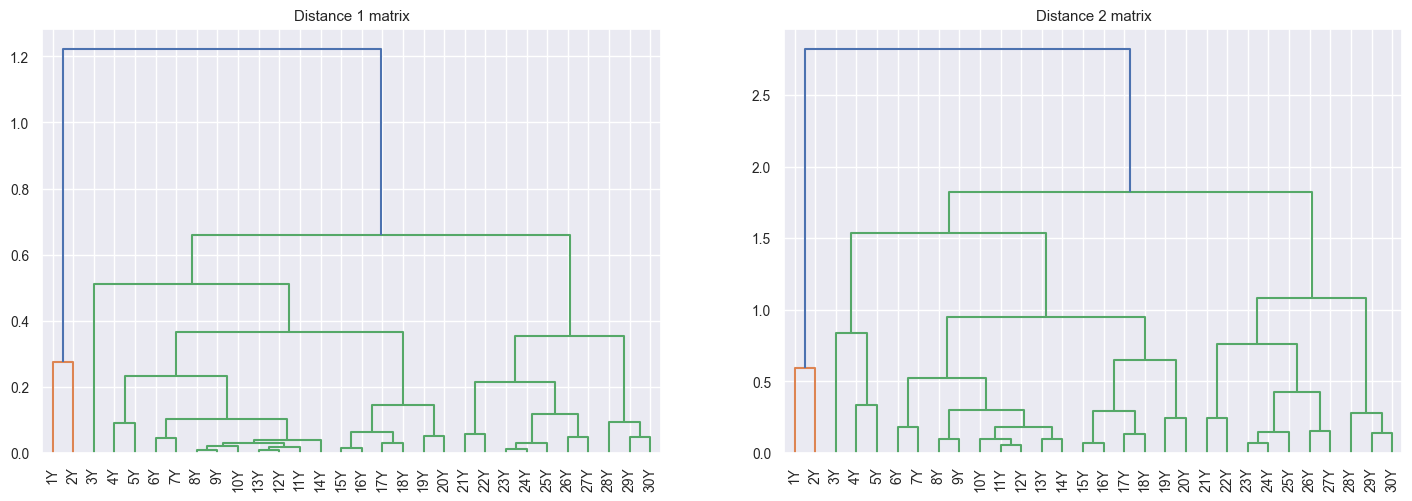

In [8]:
# hierarchical clustering
from scipy.cluster.hierarchy import linkage
row_clusters_1 = linkage(dist_1, method='complete', optimal_ordering=True)
row_clusters_2 = linkage(dist_2, method='complete', optimal_ordering=True)

# plot 2 dendrograms for each distance matrix
from scipy.cluster.hierarchy import dendrogram
fig, ax = plt.subplots(1,2, figsize=(11.7*1.5,8.27/1.5))
dendrogram(row_clusters_1, labels=dist_1.index, ax=ax[0], leaf_rotation=90)
ax[0].set_title('Distance 1 matrix')
dendrogram(row_clusters_2, labels=dist_2.index, ax=ax[1], leaf_rotation=90)
ax[1].set_title('Distance 2 matrix')
plt.show()


In [9]:
# minimum spanning tree graph (MST)
# MST is a subgraph of the original graph G that connects all vertices together, without any cycles and with the minimum possible total edge weight.

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'dist' is your distance matrix as a 2D numpy array
# Make sure your distance matrix is symmetric and the diagonal is zero

# Convert the distance matrix to a graph
G = nx.Graph()

# Add the nodes
G.add_nodes_from(dist_2.index)

# Add the edges
for i in range(dist_2.shape[0]):
    for j in range(dist_2.shape[1]):
        G.add_edge(dist_2.index[i], dist_2.columns[j], weight=(dist_2.iloc[i, j]))

# Draw the graph
#nx.draw(G, pos = nx.spring_layout(G), with_labels=True, node_size=500, font_size=20)
T = nx.minimum_spanning_tree(G)


In [11]:
# sort edges by weight
# Get the minimum spanning tree
# theme for seaborn plots
#T = nx.minimum_spanning_tree(G)
sortededeges = sorted(T.edges(data=True), key=lambda t: t[2].get('weight', 1))

def f(s):
    if len(s) == 2:
        return ' '+s
    else:
        return s

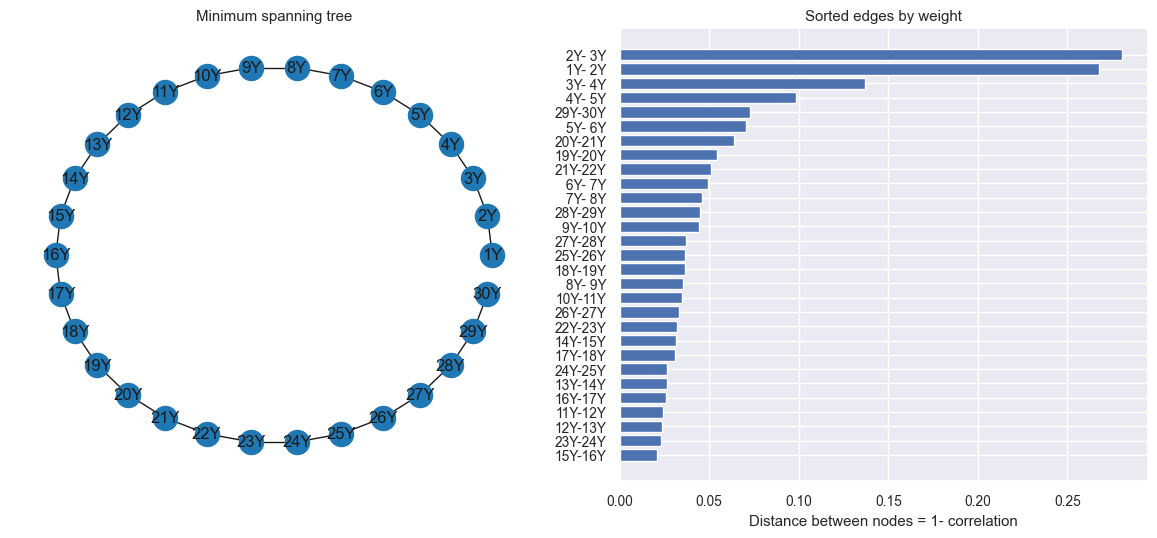

In [12]:
# on the same graph draw minimum spanning tree and sorted edges by weight
# plot MST
# plot sorted edges by weight
fig, ax = plt.subplots(1,2, figsize=(11.7,8.27/1.5))
nx.draw(T,pos= nx.circular_layout(T), with_labels=True, ax=ax[0])
ax[0].set_title('Minimum spanning tree')
ax[0].set_axis_off()
# plot sorted edges by weight
ax[1].barh(range(len(sortededeges)), [sortededeges[i][2]['weight'] for i in range(len(sortededeges))])
ax[1].set_yticks(range(len(sortededeges)))
ax[1].set_yticklabels([f(sortededeges[i][0]) + '-' + f(sortededeges[i][1]) for i in range(len(sortededeges))])
ax[1].set_xlabel('Distance between nodes = 1- correlation')
ax[1].set_title('Sorted edges by weight')
plt.tight_layout()
plt.show()


### Spectral analysis

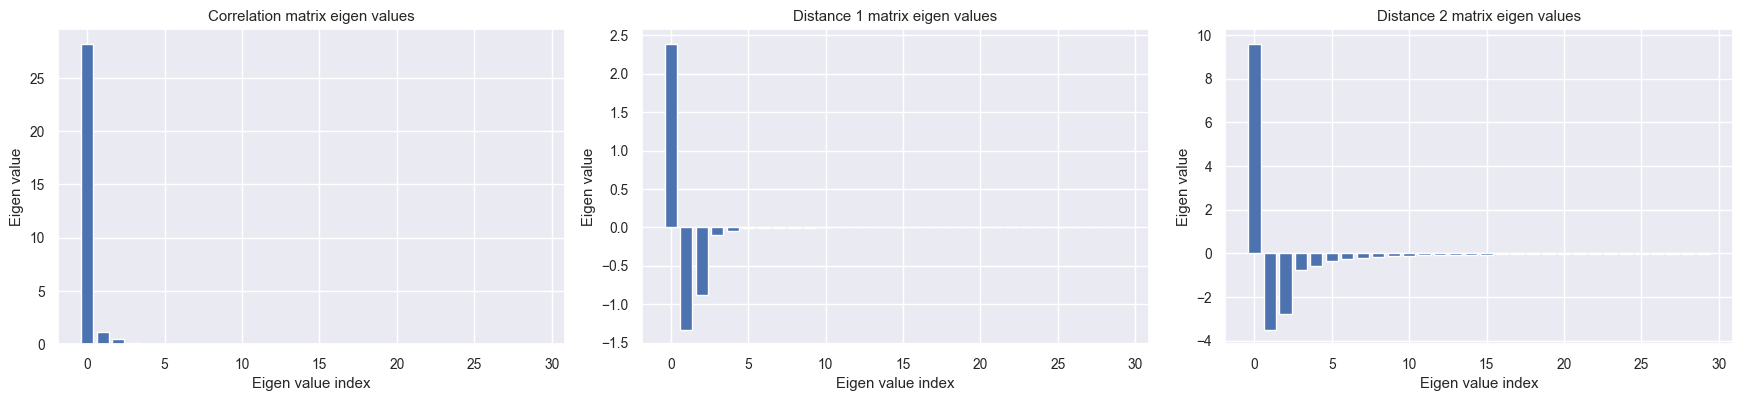

In [13]:
# eigen values analysis of the correlation matrix, distance matrix 1 and distance matrix 2
from numpy import linalg as LA
corr_eigvals, corr_eigvecs = LA.eig(corr)
dist1_eigvals, dist1_eigvecs = LA.eig(dist_1)
dist2_eigvals, dist2_eigvecs = LA.eig(dist_2)

# plot eigen values bar plot for correlation matrix and distance matrix 1 and 2
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
ax[0].bar(range(len(corr_eigvals)), corr_eigvals)
ax[0].set_title('Correlation matrix eigen values')
ax[0].set_xlabel('Eigen value index')
ax[0].set_ylabel('Eigen value')
ax[1].bar(range(len(dist1_eigvals)), dist1_eigvals)
ax[1].set_title('Distance 1 matrix eigen values')
ax[1].set_xlabel('Eigen value index')
ax[1].set_ylabel('Eigen value')
ax[2].bar(range(len(dist2_eigvals)), dist2_eigvals)
ax[2].set_title('Distance 2 matrix eigen values')
ax[2].set_xlabel('Eigen value index')
ax[2].set_ylabel('Eigen value')
plt.tight_layout()
plt.show()



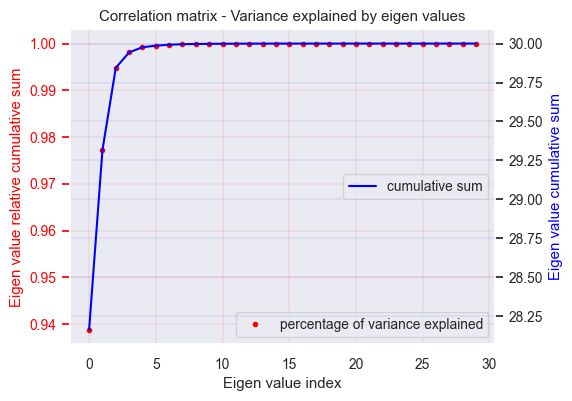

In [14]:
# plot eigen values cumulative sum and on the twin axis show th cumsum.sum  for the correlation matrix
fig, ax = plt.subplots(1,1, figsize=(11.7/2,8.27/2))
ax.set_title('Correlation matrix - Variance explained by eigen values')
ax.set_xlabel('Eigen value index')
ax.set_ylabel('Eigen value relative cumulative sum')
# grid color
ax.grid(color='red', linestyle='-', linewidth=0.1, alpha=0.9)
# y label corlors
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')



# twin
ax2 = ax.twinx()
ax2.plot(range(len(corr_eigvals)), corr_eigvals.cumsum(), label= 'cumulative sum', color='blue')
ax.plot(range(len(corr_eigvals)), corr_eigvals.cumsum()/corr_eigvals.sum(), '.', label= 'percentage of variance explained', color='red') 

ax2.set_ylabel('Eigen value cumulative sum')
# grid color with trancparency 0.5
ax2.grid(color='blue', linestyle='-', linewidth=0.1, alpha=0.9)
ax2.yaxis.label.set_color('blue')
# legends
ax.legend(loc= 'lower right' ) # center right
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()

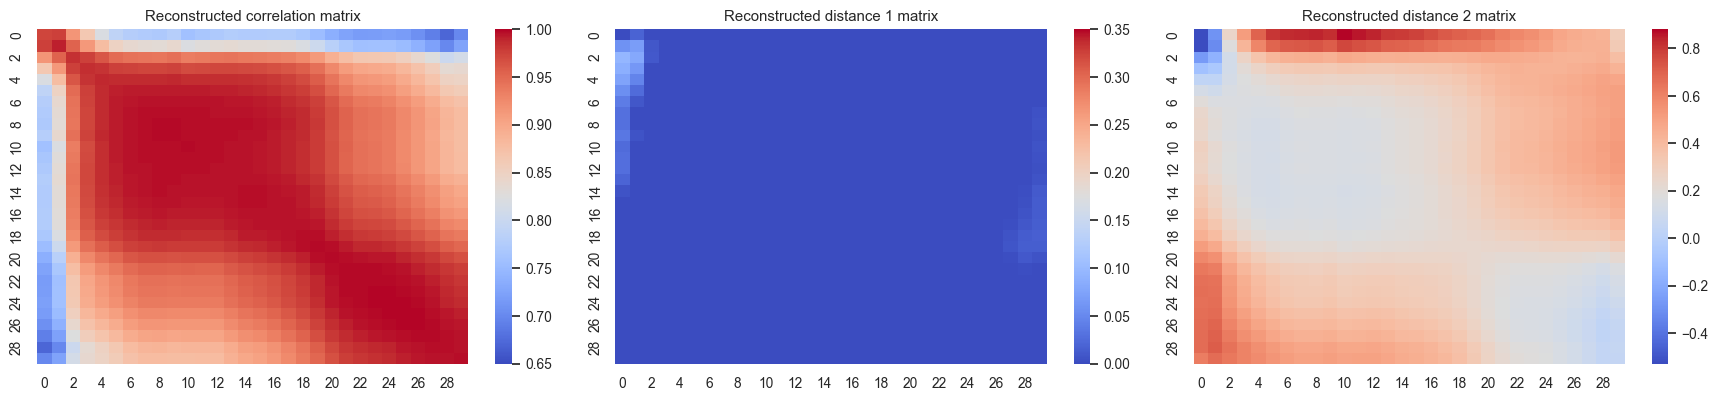

In [15]:
# reconstruct correlation matrix,  and distance matrix 1 and 2 from largest 3 eigen values and eigen vectors
# correlation matrix
corr_eigvals_3 = corr_eigvals.copy()
corr_eigvals_3[3:] = 0
corr_eigvecs_3 = corr_eigvecs.copy()
corr_eigvecs_3[:,3:] = 0
corr_recon = corr_eigvecs_3 @ np.diag(corr_eigvals_3) @ corr_eigvecs_3.T

# distance matrix 1
dist1_eigvals_3 = dist1_eigvals.copy()
dist1_eigvals_3[3:] = 0
dist1_eigvecs_3 = dist1_eigvecs.copy()
dist1_eigvecs_3[:,3:] = 0
dist1_recon = dist1_eigvecs_3 @ np.diag(dist1_eigvals_3) @ corr_eigvecs_3.T

# distance matrix 2
dist2_eigvals_3 = dist2_eigvals.copy()
dist2_eigvals_3[3:] = 0
dist2_eigvecs_3 = dist2_eigvecs.copy()
dist2_eigvecs_3[:,3:] = 0
dist2_recon = dist2_eigvecs_3 @ np.diag(dist2_eigvals_3) @ corr_eigvecs_3.T

# plot reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 3 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
sns.heatmap(corr_recon, ax=ax[0], cmap='coolwarm', vmin=0.65, vmax=1)
ax[0].set_title('Reconstructed correlation matrix')
sns.heatmap(dist1_recon, ax=ax[1], cmap='coolwarm', vmin=0, vmax=0.35)
ax[1].set_title('Reconstructed distance 1 matrix')
sns.heatmap(dist2_recon, ax=ax[2], cmap='coolwarm')
ax[2].set_title('Reconstructed distance 2 matrix')
plt.tight_layout()
plt.show()


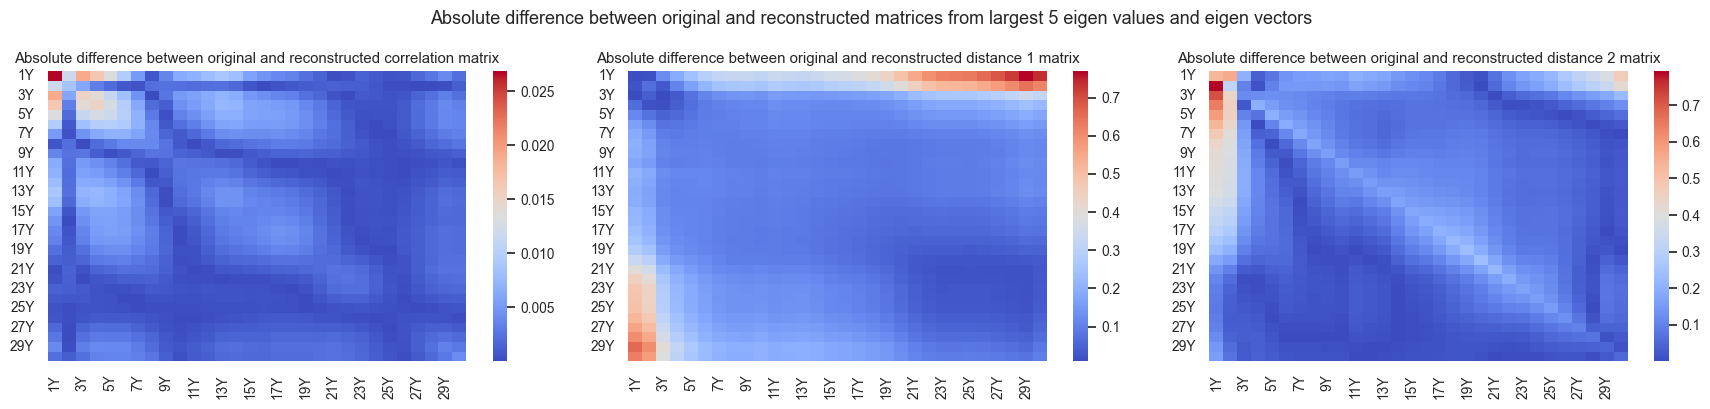

In [16]:
# difference between original and reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 5 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
sns.heatmap(np.abs(corr-corr_recon), ax=ax[0], cmap='coolwarm')
ax[0].set_title('Absolute difference between original and reconstructed correlation matrix')
sns.heatmap(np.abs(dist_1-dist1_recon), ax=ax[1], cmap='coolwarm')
ax[1].set_title('Absolute difference between original and reconstructed distance 1 matrix')
sns.heatmap(np.abs(dist_2-dist2_recon), ax=ax[2], cmap='coolwarm')
ax[2].set_title('Absolute difference between original and reconstructed distance 2 matrix')
# super title
plt.suptitle('Absolute difference between original and reconstructed matrices from largest 5 eigen values and eigen vectors')
plt.tight_layout()
plt.show()

We look at diagonal elements because we know their values the only ground tructh know thanks to structure of the correlation matrix

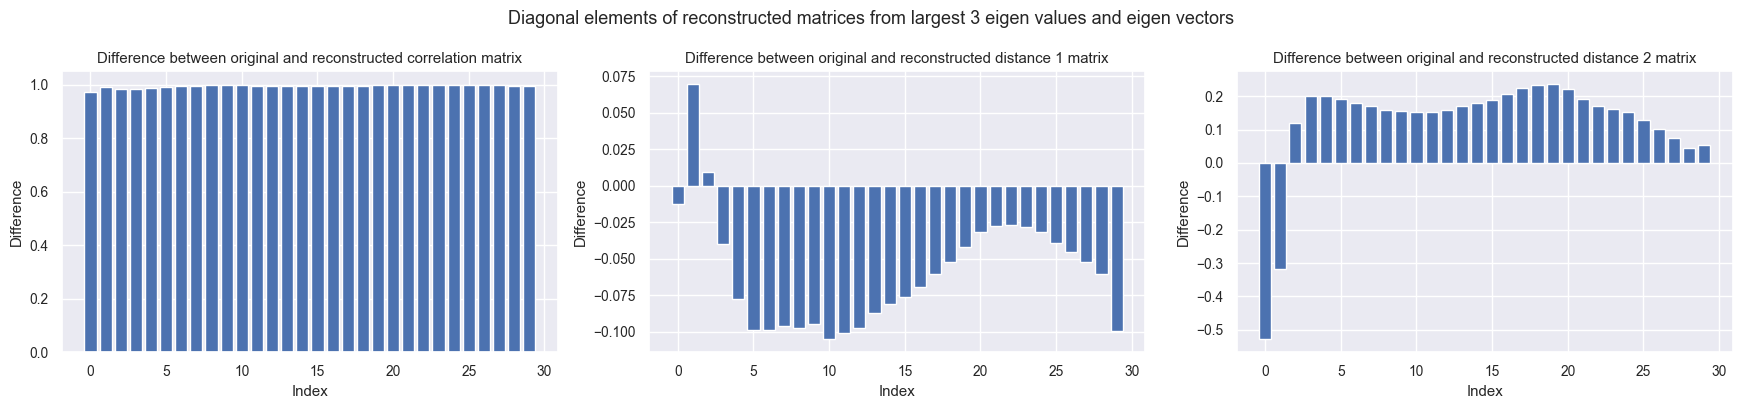

In [17]:
# diagonal elements of the difference between original and reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 3 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
ax[0].bar(range(len(corr)), np.diag(corr_recon))
ax[0].set_title('Difference between original and reconstructed correlation matrix')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Difference')
ax[1].bar(range(len(dist_1)), np.diag(dist1_recon))
ax[1].set_title('Difference between original and reconstructed distance 1 matrix')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Difference')
ax[2].bar(range(len(dist_2)), np.diag(dist2_recon))
ax[2].set_title('Difference between original and reconstructed distance 2 matrix')
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Difference')
# add global title
plt.suptitle('Diagonal elements of reconstructed matrices from largest 3 eigen values and eigen vectors')
plt.tight_layout()
plt.show()


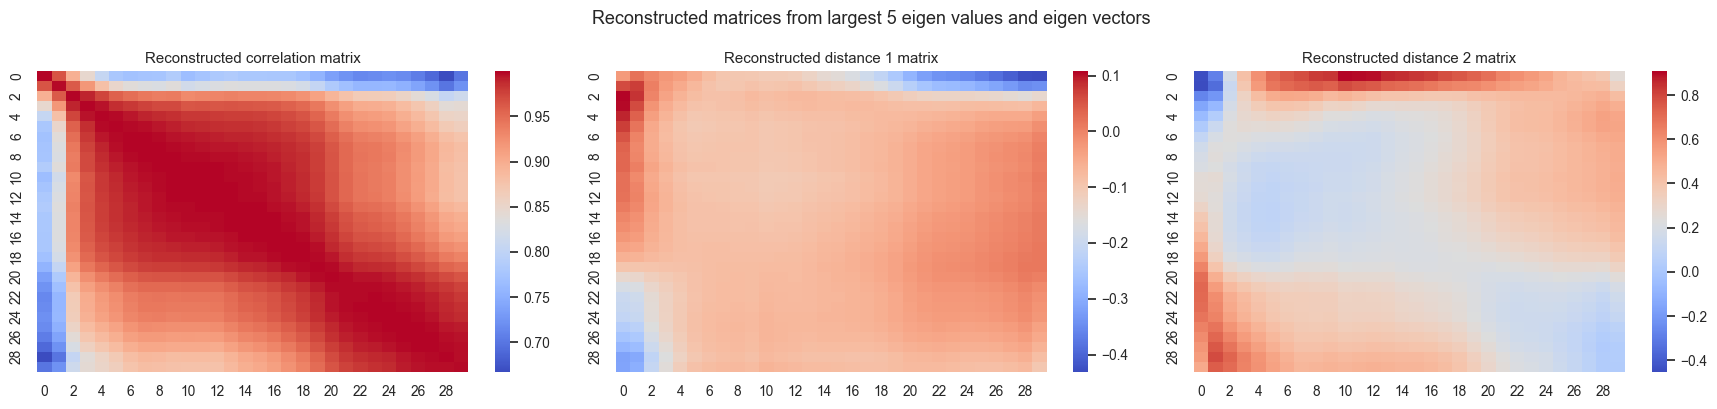

In [18]:
## redo with 5 eigen values and eigen vectors
# correlation matrix
corr_eigvals_5 = corr_eigvals.copy()
corr_eigvals_5[5:] = 0
corr_eigvecs_5 = corr_eigvecs.copy()
corr_eigvecs_5[:,5:] = 0
corr_recon_5 = corr_eigvecs_5 @ np.diag(corr_eigvals_5) @ corr_eigvecs_5.T

# distance matrix 1
dist1_eigvals_5 = dist1_eigvals.copy()
dist1_eigvals_5[5:] = 0
dist1_eigvecs_5 = dist1_eigvecs.copy()
dist1_eigvecs_5[:,5:] = 0
dist1_recon_5 = dist1_eigvecs_5 @ np.diag(dist1_eigvals_5) @ corr_eigvecs_5.T

# distance matrix 2
dist2_eigvals_5 = dist2_eigvals.copy()
dist2_eigvals_5[5:] = 0
dist2_eigvecs_5 = dist2_eigvecs.copy()
dist2_eigvecs_5[:,5:] = 0
dist2_recon_5 = dist2_eigvecs_5 @ np.diag(dist2_eigvals_5) @ corr_eigvecs_5.T

# plot reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 3 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
sns.heatmap(corr_recon_5, ax=ax[0], cmap='coolwarm')
ax[0].set_title('Reconstructed correlation matrix')
sns.heatmap(dist1_recon_5, ax=ax[1], cmap='coolwarm')
ax[1].set_title('Reconstructed distance 1 matrix')
sns.heatmap(dist2_recon_5, ax=ax[2], cmap='coolwarm')
ax[2].set_title('Reconstructed distance 2 matrix')
# super title
plt.suptitle('Reconstructed matrices from largest 5 eigen values and eigen vectors')
plt.tight_layout()
plt.show()



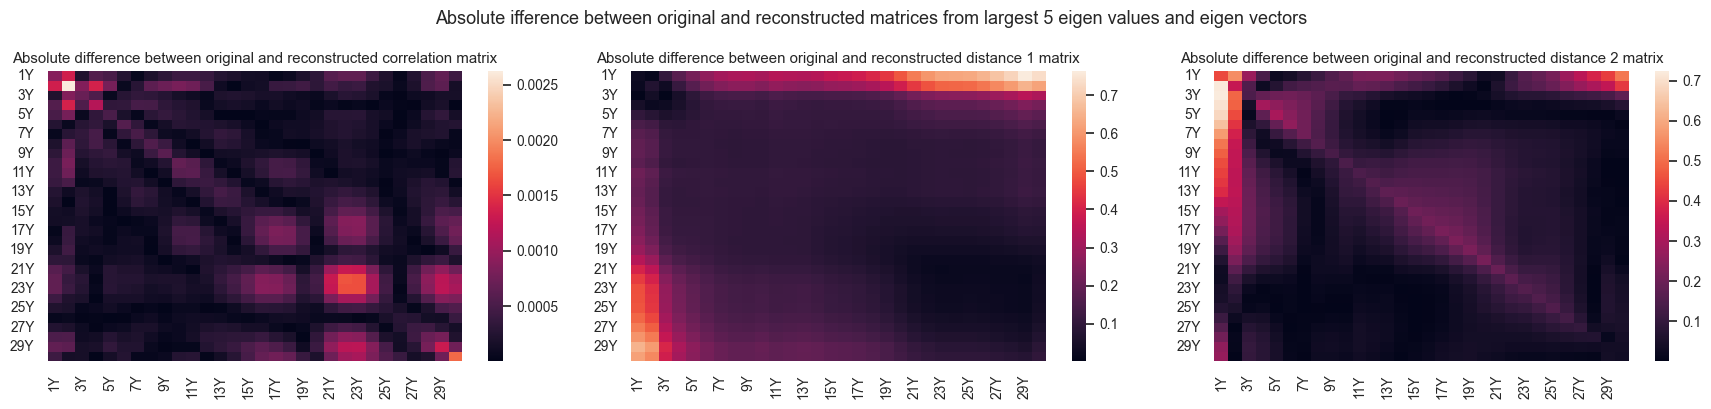

In [19]:
# difference between original and reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 5 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
sns.heatmap(np.abs(corr-corr_recon_5), ax=ax[0])
ax[0].set_title('Absolute difference between original and reconstructed correlation matrix')
sns.heatmap(np.abs(dist_1-dist1_recon_5), ax=ax[1])
ax[1].set_title('Absolute difference between original and reconstructed distance 1 matrix')
sns.heatmap(np.abs(dist_2-dist2_recon_5), ax=ax[2])
ax[2].set_title('Absolute difference between original and reconstructed distance 2 matrix')
# super title
plt.suptitle('Absolute ifference between original and reconstructed matrices from largest 5 eigen values and eigen vectors')
plt.tight_layout()
plt.show()


We look at diagonal elements because we know their values the only ground tructh know thanks to structure of the correlation matrix

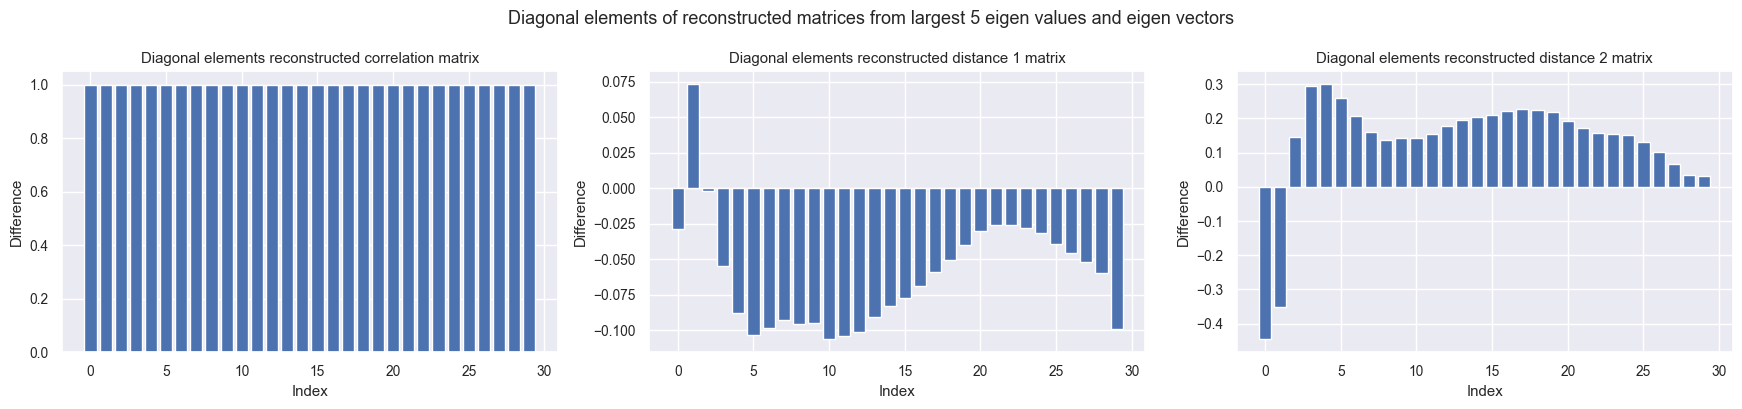

In [20]:
# diagonal elements of the difference between original and reconstructed correlation matrix,  and distance matrix 1 and 2 from largest 5 eigen values and eigen vectors
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
ax[0].bar(range(len(corr)), np.diag(corr_recon_5))
ax[0].set_title('Diagonal elements reconstructed correlation matrix')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Difference')
ax[1].bar(range(len(dist_1)), np.diag(dist1_recon_5))
ax[1].set_title('Diagonal elements reconstructed distance 1 matrix')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Difference')
ax[2].bar(range(len(dist_2)), np.diag(dist2_recon_5))
ax[2].set_title('Diagonal elements reconstructed distance 2 matrix')
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Difference')
# add global title
plt.suptitle('Diagonal elements of reconstructed matrices from largest 5 eigen values and eigen vectors')
plt.tight_layout()
plt.show()



idea : when recntruction the matrixusing the largest k eigenvalues we ca force it to have one on the diagonal and arounde the diagonal for example

## Bootsraping
The main idea here is to find some kind of a ground truth matrix to be compared with noisy one
As ground truth matrix we have some ideas given the 4 years histrorical data :
- Bootstrap $n$ days (time horizon for the empircal estimator) -> compute the empiricale correlation matrix
- Reapeat the procedure $N$ times to get $N$ bootstraped matrix
- Study the distribution and the risk (fluctuation) of the empiricale estimator:
    - Distribution of each correlation value $\hat{\rho}_{i,j}, i,j \in \{1,..., 30\}$
    - Distribution of each eigenvalue (the largest on or the most largest one)

In [34]:
# Bootstrap the data fram and calculate the correlation matrix for each bootstrap
# plot the distribution of correlation matrix
n = len(df)
n_bootstraps = 100
n_months = 6
n_bootsrap_sample = 21*6
list_of_boostraped_corr_by_n_month = {}
n_months = [3, 6, 12, 24]
for n_month in n_months:
    n_bootsrap_sample = 21*n_month
    list_of_boostraped_corr = []
    for i in range(n_bootstraps):
        bootstrap_index = np.random.randint(0, n, (n_bootsrap_sample))
        corr_bootstrap = df.iloc[bootstrap_index].corr()
        list_of_boostraped_corr.append(corr_bootstrap)
    list_of_boostraped_corr_by_n_month[n_month] = list_of_boostraped_corr


In [35]:
data_bootstraped_by_n_month = {}
var_bootstraped_by_n_month = {}
mean_bootstraped_by_n_month = {}

for n_month in n_months:
    data_bootstraped_by_n_month[n_month] = {}
    var_bootstraped_by_n_month[n_month] = {}
    mean_bootstraped_by_n_month[n_month] = {}
    for i in range(30):
        for j in range(i+1, 30):
            data_bootstraped_by_n_month[n_month][(i,j)] = [list_of_boostraped_corr_by_n_month[n_month][k].iloc[i,j] for k in range(n_bootstraps)]
            var_bootstraped_by_n_month[n_month][(i,j)] = np.var(data_bootstraped_by_n_month[n_month][(i,j)])
            mean_bootstraped_by_n_month[n_month][(i,j)] = np.mean(data_bootstraped_by_n_month[n_month][(i,j)])



IndexError: index 6 is out of bounds for axis 0 with size 6

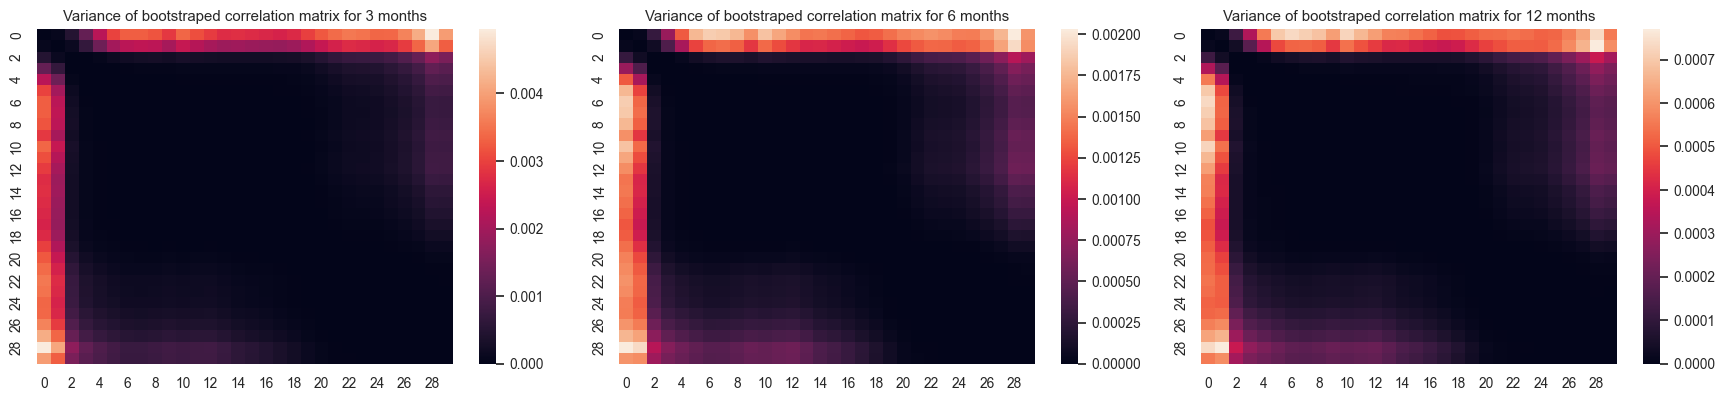

In [23]:
# for each month show heat matrix of variance of correlation matrix
fig, ax = plt.subplots(1,4, figsize=(11.7*1.5,8.27/2))
for k, n_month in enumerate(n_months):
    a = np.zeros((30,30))
    for i in range(30):
        for j in range(i+1, 30):
            a[i,j] = var_bootstraped_by_n_month[n_month][(i,j)]
            a[j,i] = var_bootstraped_by_n_month[n_month][(i,j)]
    sns.heatmap(a, ax=ax[k])
    ax[k].set_title('Variance of bootstraped correlation matrix for {} months'.format(n_month))
plt.tight_layout()
plt.show()


In [24]:
# choose n different random couple (i, j) such that random value i from 0 to 29 and random value j from i+1 to 29
list_of_random_couple = [(i,j) for i in range(30) for j in range(i+1, 30)]
index = np.arange(len(list_of_random_couple))
np.random.shuffle(index)
list_of_random_couple = [list_of_random_couple[i] for i in index[:30]]

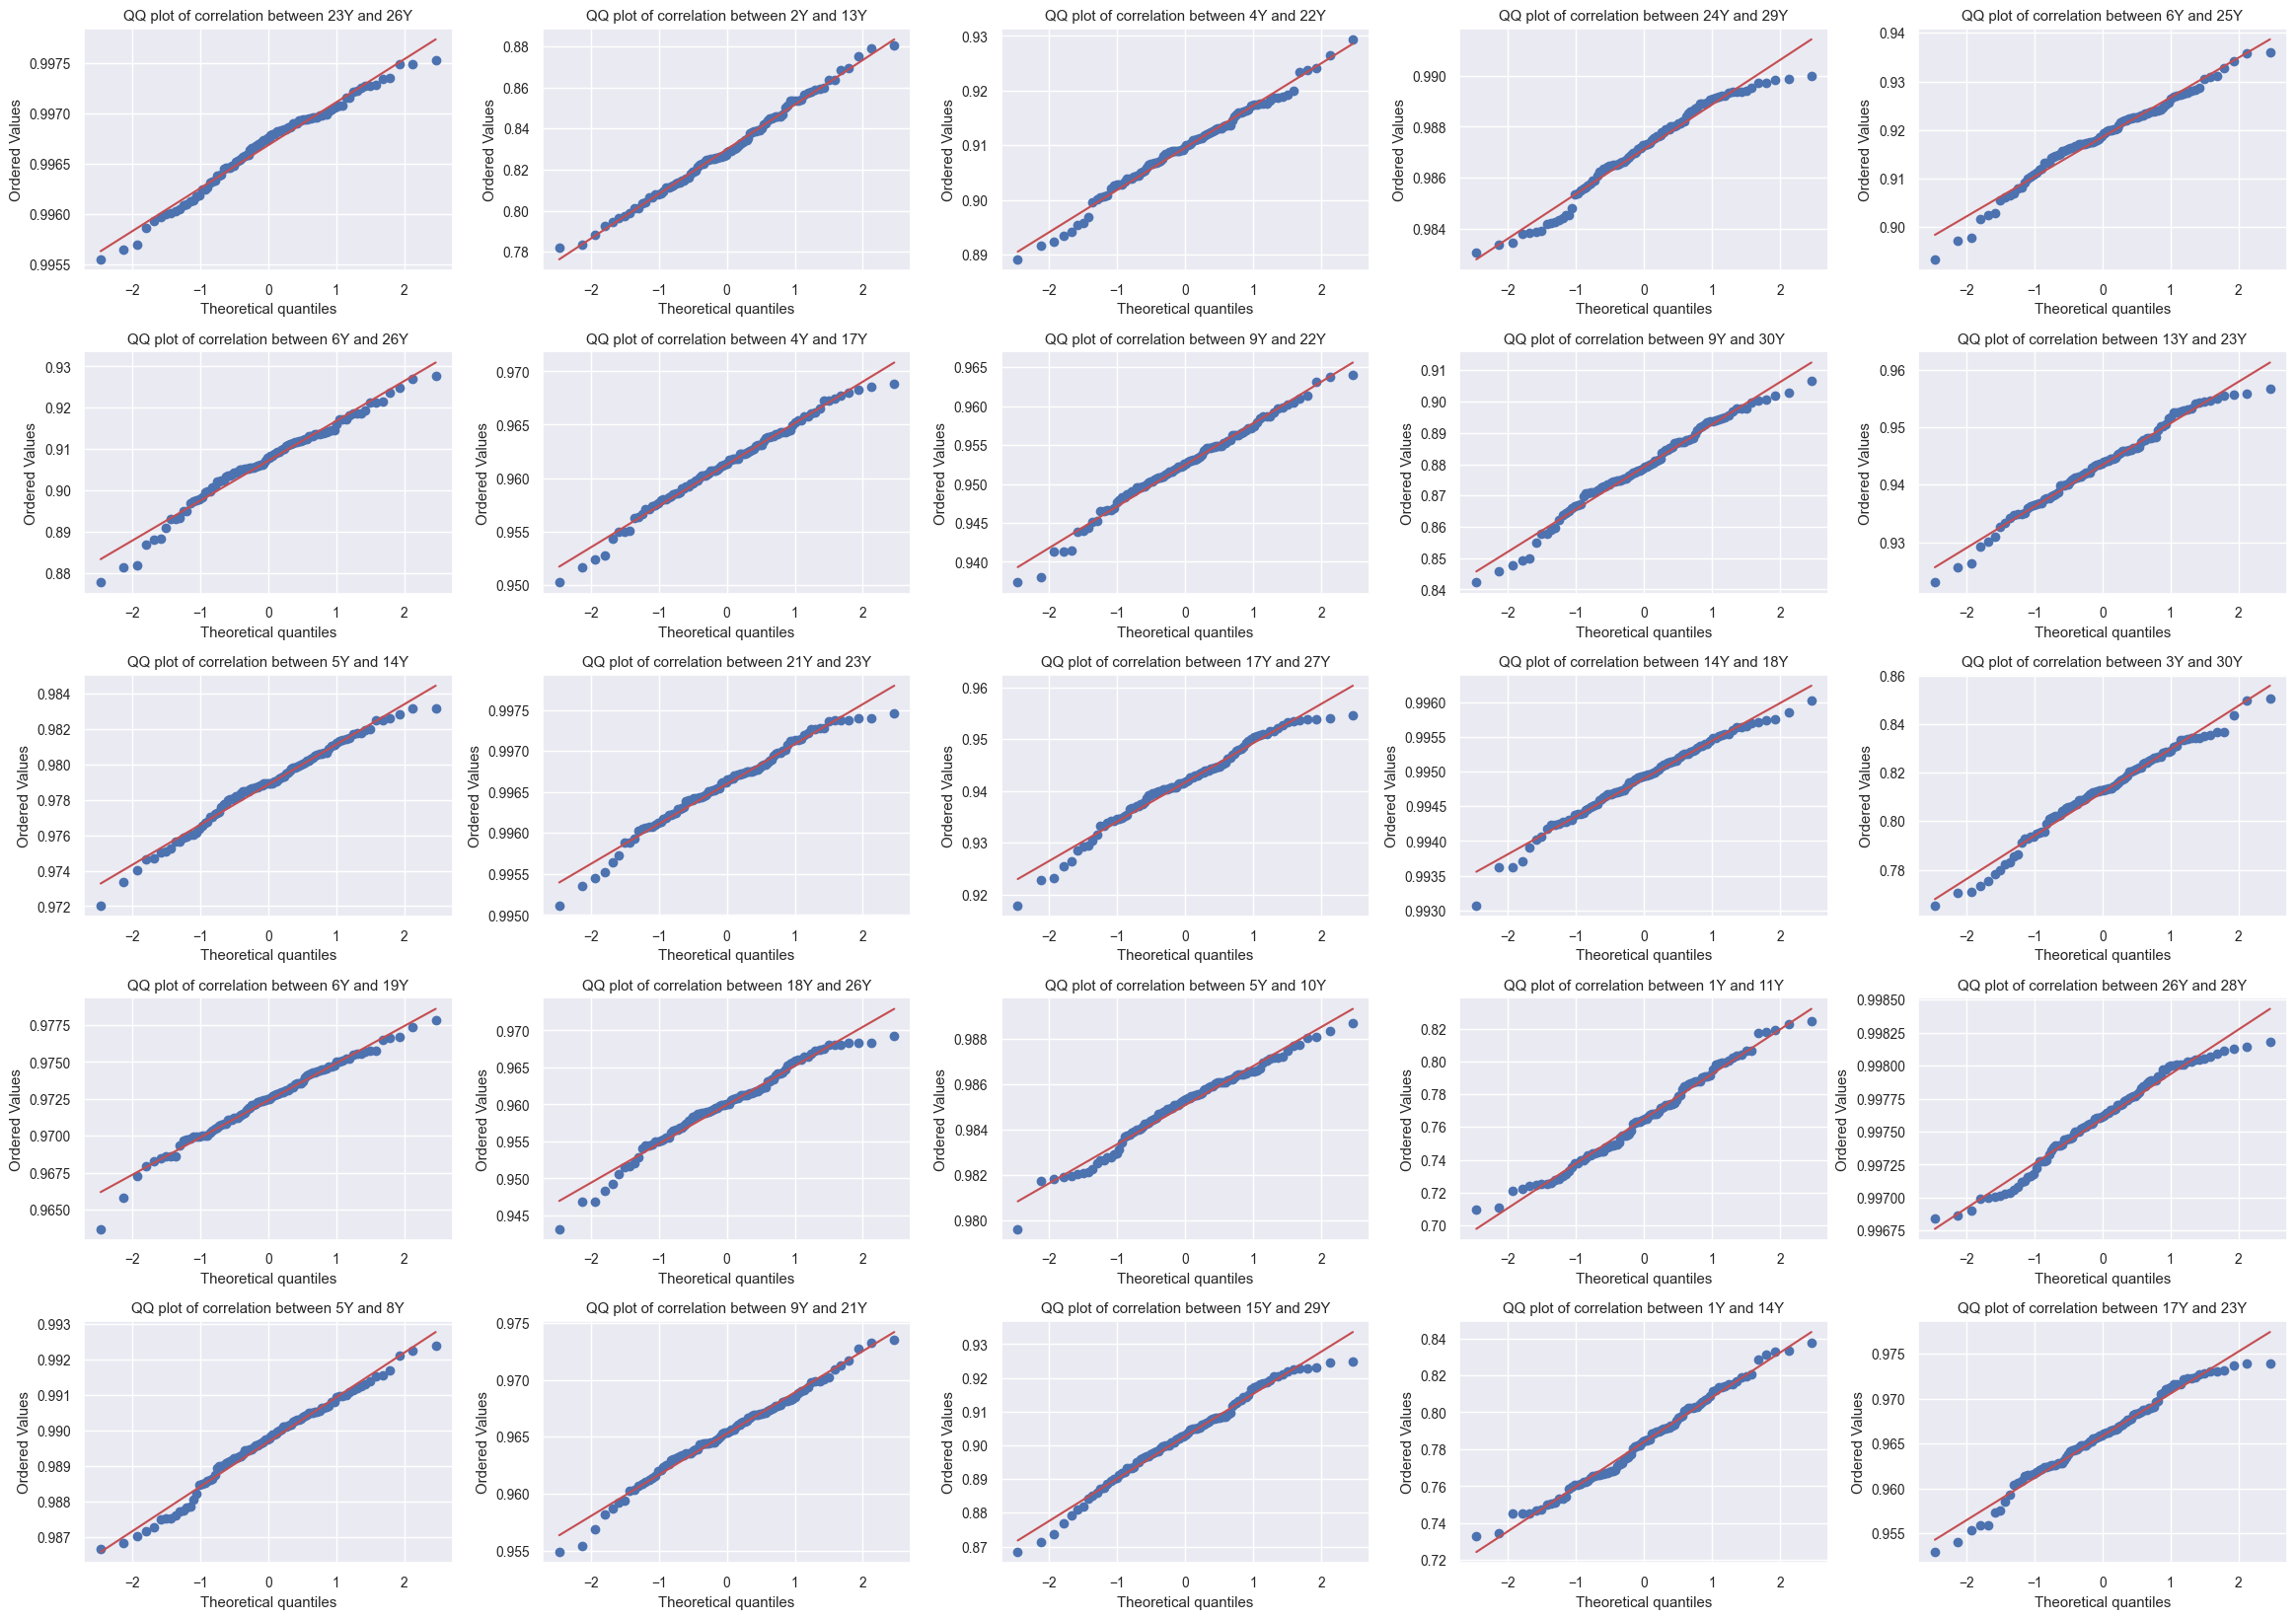

In [25]:
from scipy.stats import probplot
fig, ax = plt.subplots(5,5, figsize=(11.7*2,8.27*2))
for i in range(5):
    for j in range(5):
        x= list_of_random_couple[i*5+j][0]
        y= list_of_random_couple[i*5+j][1]
        probplot([list_of_boostraped_corr[k].iloc[x, y] for k in range(n_bootstraps)], plot=ax[i,j])
        ax[i,j].set_title('QQ plot of correlation between '+df.columns[x]+' and '+df.columns[y])
plt.tight_layout()
plt.show()

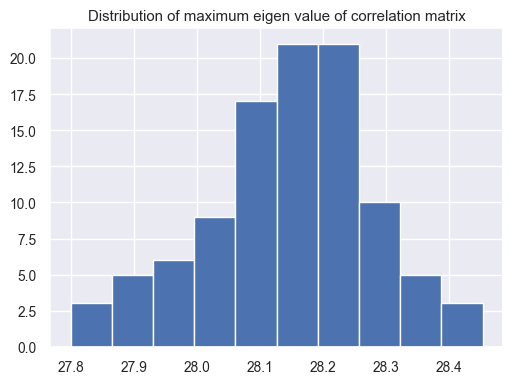

In [26]:
# distribution of maximum eigen value of correlation matrix
corr_eigvals_max = []
for i in range(n_bootstraps):
    corr_eigvals, corr_eigvecs = LA.eig(list_of_boostraped_corr[i])
    corr_eigvals_max.append(np.max(corr_eigvals))
plt.hist(corr_eigvals_max)
plt.title('Distribution of maximum eigen value of correlation matrix')
plt.show()


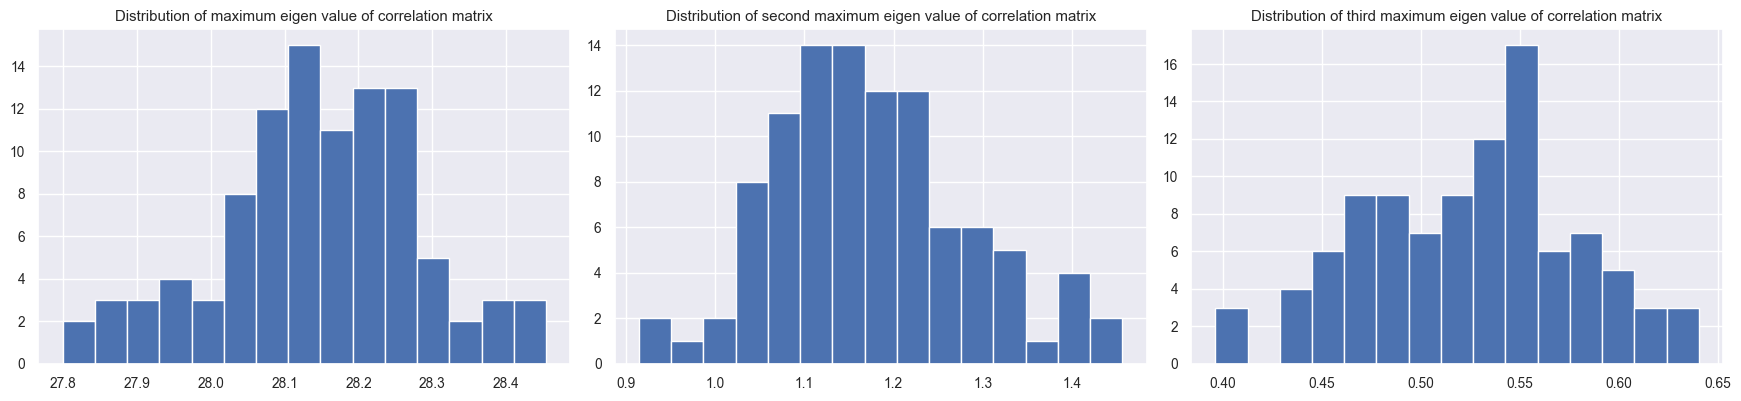

std of distribution of maximum eigen value of correlation matrix:  0.1346917121912339
std of distribution of second maximum eigen value of correlation matrix:  0.11027803909212792
std of distribution of third maximum eigen value of correlation matrix:  0.05324459821729129
std/mean of distribution of maximum eigen value of correlation matrix:  0.004785445802427384
std/mean of distribution of second maximum eigen value of correlation matrix:  0.09385536459309392
std/mean of distribution of third maximum eigen value of correlation matrix:  0.10143539217753543


In [27]:
# distribution of the largest 3 eigen values of correlation matrix
corr_eigvals_max = []
corr_eigvals_max_2 = []
corr_eigvals_max_3 = []
for i in range(n_bootstraps):
    corr_eigvals, corr_eigvecs = LA.eig(list_of_boostraped_corr[i])
    corr_eigvals_max.append(np.max(corr_eigvals))
    corr_eigvals_max_2.append(np.sort(corr_eigvals)[-2])
    corr_eigvals_max_3.append(np.sort(corr_eigvals)[-3])
fig, ax = plt.subplots(1,3, figsize=(11.7*1.5,8.27/2))
ax[0].hist(corr_eigvals_max, bins=15)
ax[0].set_title('Distribution of maximum eigen value of correlation matrix')
ax[1].hist(corr_eigvals_max_2, bins=15)
ax[1].set_title('Distribution of second maximum eigen value of correlation matrix')
ax[2].hist(corr_eigvals_max_3, bins=15)
ax[2].set_title('Distribution of third maximum eigen value of correlation matrix')
plt.tight_layout()
plt.show()
# print std of each distribution
print('std of distribution of maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max))
print('std of distribution of second maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max_2))
print('std of distribution of third maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max_3))


# print std/mean of each distribution
print('std/mean of distribution of maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max)/np.mean(corr_eigvals_max))
print('std/mean of distribution of second maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max_2)/np.mean(corr_eigvals_max_2))
print('std/mean of distribution of third maximum eigen value of correlation matrix: ', np.std(corr_eigvals_max_3)/np.mean(corr_eigvals_max_3))


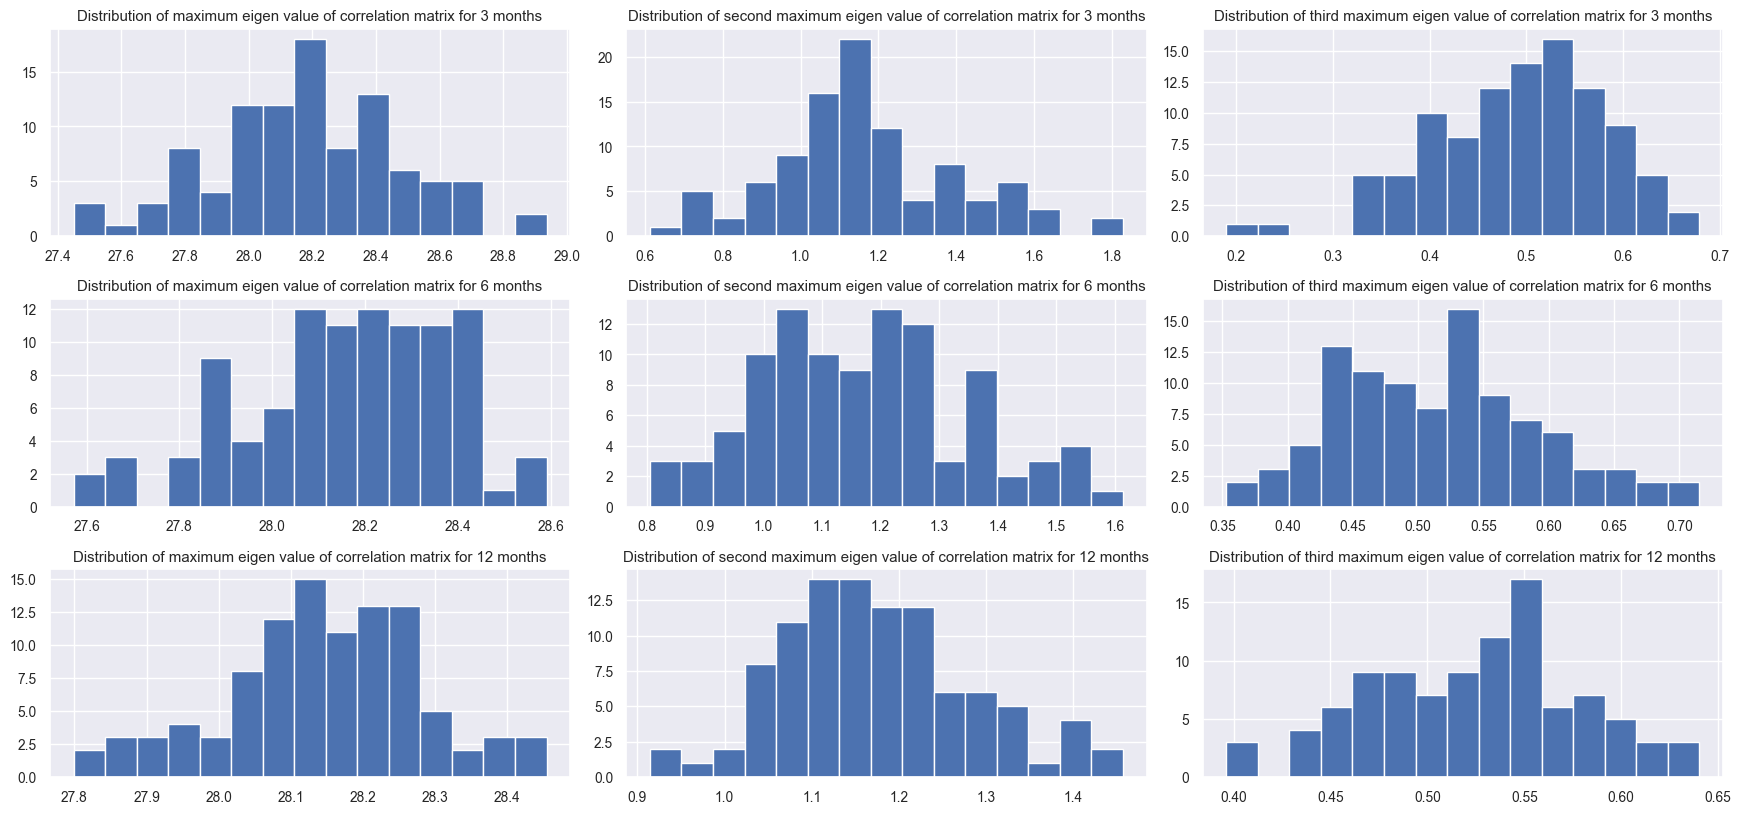

In [33]:
# for each month show the varaition of the largest 3 eigen values of correlation matrix with the same scale in the figures
# then print the std and std/mean of each distribution
fig, ax = plt.subplots(3,3, figsize=(11.7*1.5,8.27))
for k, n_month in enumerate(n_months):
    corr_eigvals_max = []
    corr_eigvals_max_2 = []
    corr_eigvals_max_3 = []
    for i in range(n_bootstraps):
        corr_eigvals, corr_eigvecs = LA.eig(list_of_boostraped_corr_by_n_month[n_month][i])
        corr_eigvals_max.append(np.max(corr_eigvals))
        corr_eigvals_max_2.append(np.sort(corr_eigvals)[-2])
        corr_eigvals_max_3.append(np.sort(corr_eigvals)[-3])
    ax[k,0].hist(corr_eigvals_max, bins=15)
    ax[k,0].set_title('Distribution of maximum eigen value of correlation matrix for {} months'.format(n_month))
    ax[k,1].hist(corr_eigvals_max_2, bins=15)
    ax[k,1].set_title('Distribution of second maximum eigen value of correlation matrix for {} months'.format(n_month))
    ax[k,2].hist(corr_eigvals_max_3, bins=15)
    ax[k,2].set_title('Distribution of third maximum eigen value of correlation matrix for {} months'.format(n_month))
plt.tight_layout()
plt.show()
# print std of each distribution
# aggregating results in a dataframe
std_of_max_eigval = []
std_of_second_max_eigval = []
std_of_third_max_eigval = []
std_over_mean_of_max_eigval = []
std_over_mean_of_second_max_eigval = []
std_over_mean_of_third_max_eigval = []

for k, n_month in enumerate(n_months):
    corr_eigvals_max = []
    corr_eigvals_max_2 = []
    corr_eigvals_max_3 = []
    for i in range(n_bootstraps):
        corr_eigvals, corr_eigvecs = LA.eig(list_of_boostraped_corr_by_n_month[n_month][i])
        corr_eigvals_max.append(np.max(corr_eigvals))
        corr_eigvals_max_2.append(np.sort(corr_eigvals)[-2])
        corr_eigvals_max_3.append(np.sort(corr_eigvals)[-3])
    std_of_max_eigval.append(np.std(corr_eigvals_max))
    std_of_second_max_eigval.append(np.std(corr_eigvals_max_2))
    std_of_third_max_eigval.append(np.std(corr_eigvals_max_3))
    std_over_mean_of_max_eigval.append(np.std(corr_eigvals_max)/np.mean(corr_eigvals_max))
    std_over_mean_of_second_max_eigval.append(np.std(corr_eigvals_max_2)/np.mean(corr_eigvals_max_2))
    std_over_mean_of_third_max_eigval.append(np.std(corr_eigvals_max_3)/np.mean(corr_eigvals_max_3))




In [32]:

df = pd.DataFrame({'std_of_eigval_1':std_of_max_eigval, 'std_of_second_eigval_2':std_of_second_max_eigval, 'std_of_third_eigval_3':std_of_third_max_eigval, 'std_over_mean_of_eigval_1':std_over_mean_of_max_eigval, 'std_over_mean_of_second_eigval_2':std_over_mean_of_second_max_eigval, 'std_over_mean_of_third_eigval_3':std_over_mean_of_third_max_eigval}, index=n_months)
print(df.T)

                                        3         6         12
std_of_eigval_1                   0.297604  0.219962  0.134692
std_of_second_eigval_2            0.235321  0.176070  0.110278
std_of_third_eigval_3             0.088561  0.077200  0.053245
std_over_mean_of_eigval_1         0.010558  0.007811  0.004785
std_over_mean_of_second_eigval_2  0.200919  0.150298  0.093855
std_over_mean_of_third_eigval_3   0.180484  0.149337  0.101435
